In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def create_environment(cities = ['A','B','C','D','E','F','G'],  path = ['A', 'F', 'D', 'E'], eps = 0.0001):
    N =len(cities)
    def distance_matrix(cities, path):
        env = pd.DataFrame(data=np.ones((N,N)) * 10, columns=cities, index = cities)
        
        ## -1: disallowed passage
        for i in range(N):
            env.loc[cities[i], cities[i]] = -1

        for i in range(len(path)-1):
            env.loc[path[i], path[i+1]] = 1
            env.loc[path[i+1], path[i]] = 1

        return env

    def pheremon_matrix(cities, eps = eps):
        N =len(cities)
        return pd.DataFrame(data=np.ones((N,N)) * eps, columns=cities, index = cities)

    return distance_matrix(cities, path), pheremon_matrix(cities)

In [3]:
class ant():
    def __init__(self, env, phe, 
                 start = 'A', end = 'E',
                alpha = 1, beta = 1):
        
        self.env, self.phe  = env, phe
        self.alpha, self.beta = alpha, beta
        self.cities = list(self.env.columns)
        self.current_city = start
        self.target_city = end
        
        self.route = [self.current_city]
        
        self.possible_cities = self.cities.copy()
        self.possible_cities.remove(self.current_city)
    
    def move(self):
        if self.current_city == self.target_city:
            return
        
        distances = env.loc[self.current_city , env.loc[self.current_city ] > 0][self.possible_cities]
        pheremons = phe.loc[self.current_city , env.loc[self.current_city ] > 0][self.possible_cities]
        
        preferences = pheremons**self.alpha/distances**self.beta
        probabilities = preferences/preferences.sum()
        #print(probabilities)
        
        self.current_city = np.random.choice(a = probabilities.index, 
                                             size=1, 
                                             p = probabilities.values)[0]
        
        self.route.append(self.current_city) 
        self.possible_cities.remove(self.current_city)
        
        #self.deposit()

    def deposit(self, delta = 1):
        i, j = self.route[-2:]
        self.phe.loc[i, j] +=  delta/self.env.loc[i, j]
        self.phe.loc[j, i] +=  delta/self.env.loc[j, i]
        
    def cost(self):
        result = 0
        for i in range(len(self.route)-1):
            result += self.env.loc[self.route[i], self.route[i+1]]
        return result

In [4]:
cities = ['A','B','C','D','E','F','G']
true_path = ['A', 'B','C','D', 'E']
env, phe = create_environment(cities = cities, path = true_path)

eps = 0.0001
K = 10
time = 10
true_path_ratio = []

# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe) for k in range(K)]
    
    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for k in range(K):
            colony[k].move()
        # after independent moves, ants deposit pheremon
        for k in range(K):
            colony[k].deposit()
            
    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

In [5]:
phe

,A,B,C,D,E,F,G
A,0.0001,95.0001,0.1001,0.1001,0.0001,0.1001,0.2001
B,95.0001,0.0001,98.0001,0.0001,0.6001,0.1001,0.3001
C,0.1001,98.0001,0.0001,97.0001,0.0001,0.0001,0.0001
D,0.1001,0.0001,97.0001,0.0001,374.0001,0.0001,0.2001
E,0.0001,0.6001,0.0001,374.0001,0.0001,0.0001,1.9001
F,0.1001,0.1001,0.0001,0.0001,0.0001,0.0001,0.0001
G,0.2001,0.3001,0.0001,0.2001,1.9001,0.0001,0.0001


In [6]:
env

,A,B,C,D,E,F,G
A,-1.0,1.0,10.0,10.0,10.0,10.0,10.0
B,1.0,-1.0,1.0,10.0,10.0,10.0,10.0
C,10.0,1.0,-1.0,1.0,10.0,10.0,10.0
D,10.0,10.0,1.0,-1.0,1.0,10.0,10.0
E,10.0,10.0,10.0,1.0,-1.0,10.0,10.0
F,10.0,10.0,10.0,10.0,10.0,-1.0,10.0
G,10.0,10.0,10.0,10.0,10.0,10.0,-1.0


In [7]:
true_path_ratio

[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [8]:
[(a.cost(), a.route) for a in colony]

[(4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E'])]

## Any Graph

In [9]:
N = 50
path_len = 7
cities = ['A'+str(i) for i in range(N)]
true_path = ['A'+str(i) for i in np.random.choice(N, size=path_len,replace=False)]

start, end = true_path[0], true_path[-1]

print(cities)
print(true_path)
print(start, end )

['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49']
['A4', 'A39', 'A20', 'A23', 'A41', 'A2', 'A24']
A4 A24


In [10]:
env, phe = create_environment(cities = cities, path = true_path)

eps = 0.0001
K = 100
time = 10
true_path_ratio = []

# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe, start = start, end = end) for k in range(K)]

    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for k in range(K):
            colony[k].move()
        # after independent moves, ants deposit pheremon
        for k in range(K):
            colony[k].deposit()

    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

In [11]:
#phe

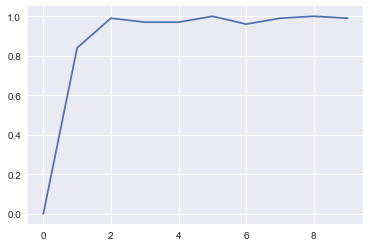

In [12]:
plt.plot(true_path_ratio)
plt.show()

In [13]:
#[(a.cost(), a.route) for a in colony]

In [14]:
true_path

['A4', 'A39', 'A20', 'A23', 'A41', 'A2', 'A24']